In [5]:
import os
import json
from web3 import Web3, HTTPProvider

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import sys
sys.path.append("../../../../utils")

from utils.etherscan_utils import get_txes_between_blocks


ModuleNotFoundError: No module named 'utils'

In [2]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
web3 = Web3(HTTPProvider(f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}"))

In [3]:
pool_addr = "0x06cb22615BA53E60D67Bf6C341a0fD5E718E1655"
lp_token_addr = "0x06cb22615BA53E60D67Bf6C341a0fD5E718E1655"
threecrv_addr = "0x6c3F90f043a72FA612cbac8115EE7e52BDe6E490"
fei_addr = "0x956F47F50A910163D8BF957Cf5846D573E7f87CA"

In [4]:
admin_2 = "0xA464e6DCda8AC41e03616F95f4BC98a13b8922Dc"
admin = "0xeCb456EA5365865EbAb8a2661B0c503410e9B347"

In [5]:
pool_addr.lower()

'0x06cb22615ba53e60d67bf6c341a0fd5e718e1655'

Need individual coin addrs:

In [7]:
with open("./3crv.json", 'r') as f:
    abi = json.load(f)
threecrv = web3.eth.contract(address=threecrv_addr, abi=abi)

with open("./mim.json", 'r') as f:
    abi = json.load(f)
fei = web3.eth.contract(address=fei_addr, abi=abi)

In [9]:
start = 13044095
end = web3.eth.block_number
end

13948509

In [23]:
pool_tx = get_txes_between_blocks(address=pool_addr.lower(), from_block=start, to_block=end)
pool_tx_blocks = [int(i['blockNumber']) for i in pool_tx]

In [24]:
len(pool_tx)

812

In [25]:
fees_for_range = []
for block in pool_tx_blocks:

    block_start = block - 1
    block_end = block + 1

    print(f"Chain checkoooor-ing blocks: {block_start}:{block_end}")

    fei_transfer_filter = fei.events.Transfer.createFilter(
        fromBlock=block_start,
        toBlock=block_end
    )
    all_transfers = fei_transfer_filter.get_all_entries()
    fei_fees = 0
    for transfer in all_transfers:

        to_address = transfer['args']['_to']
        from_address = transfer['args']['_from']
        value = transfer['args']['_value']
        block = transfer['blockNumber']
        tx_hash = transfer['transactionHash'].hex()

        if (
                from_address == pool_addr and
                to_address in [admin_2, admin]
        ):
            fei_fees += value*1e-18

    threecrv_transfer_filter = threecrv.events.Transfer.createFilter(
        fromBlock=block_start,
        toBlock=block_end
    )
    all_transfers = threecrv_transfer_filter.get_all_entries()
    threecrv_fees = 0
    for transfer in all_transfers:

        to_address = transfer['args']['_to']
        from_address = transfer['args']['_from']
        value = transfer['args']['_value']
        block = transfer['blockNumber']
        tx_hash = transfer['transactionHash'].hex()

        if (
                from_address == pool_addr and
                to_address in [admin_2, admin]
        ):
            threecrv_fees += value*1e-18

    dict_fees = {
        'block': block,
        'fei_fees': fei_fees,
        'threecrv_fees': threecrv_fees,
        'tx_hash': tx_hash
    }
    fees_for_range.append(dict_fees)

df_fees = pd.DataFrame(fees_for_range)
df_fees

Chain checkoooor-ing blocks: 13044167:13044169
Chain checkoooor-ing blocks: 13091195:13091197
Chain checkoooor-ing blocks: 13166979:13166981
Chain checkoooor-ing blocks: 13167012:13167014
Chain checkoooor-ing blocks: 13167073:13167075
Chain checkoooor-ing blocks: 13167113:13167115
Chain checkoooor-ing blocks: 13167225:13167227
Chain checkoooor-ing blocks: 13167259:13167261
Chain checkoooor-ing blocks: 13167281:13167283
Chain checkoooor-ing blocks: 13167285:13167287
Chain checkoooor-ing blocks: 13167285:13167287
Chain checkoooor-ing blocks: 13167362:13167364
Chain checkoooor-ing blocks: 13167383:13167385
Chain checkoooor-ing blocks: 13167386:13167388
Chain checkoooor-ing blocks: 13167391:13167393
Chain checkoooor-ing blocks: 13167392:13167394
Chain checkoooor-ing blocks: 13167396:13167398
Chain checkoooor-ing blocks: 13167450:13167452
Chain checkoooor-ing blocks: 13167460:13167462
Chain checkoooor-ing blocks: 13167461:13167463
Chain checkoooor-ing blocks: 13167482:13167484
Chain checkoo

,block,fei_fees,threecrv_fees,tx_hash
0,13044167,0,0.000000,0x8f51bdf121cc3ab1deb659d63c7fe8902f5ca16a0f48...
1,13091196,0,0.000000,0xaee98f534678b70e26028639da698506a72033c9326b...
2,13166980,0,0.000000,0xaee98f534678b70e26028639da698506a72033c9326b...
3,13167013,0,0.000000,0xaee98f534678b70e26028639da698506a72033c9326b...
4,13167074,0,0.000000,0xaee98f534678b70e26028639da698506a72033c9326b...
...,...,...,...,...
807,13939027,0,0.000000,0x50d62f6d7e639bbaa602e9f4daaf38d8aa90d0f6779f...
808,13939830,0,0.000000,0xfbf355d20da09037014f2d26031776c2bee469c64583...
809,13939917,0,0.000000,0x8c657aa00d7713889f0f4b68cbd94da80feecd896ba9...
810,13945263,0,5249.195345,0x6df6b59df913ce7c87c4f583f05705d17fbe9a61b9ac...


In [26]:
df_fees['total_fees'] = df_fees.fei_fees + df_fees.threecrv_fees
df_fees.index = df_fees.block
df_fees = df_fees.where(df_fees.total_fees > 0).dropna()
df_fees

,block,fei_fees,threecrv_fees,tx_hash,total_fees
block,,,,,
13184044,13184044.0,0.0,8359.579131,0xce219e3da3237d9026e699657acabadabec99a8a28f9...,8359.579131
13226495,13226495.0,0.0,9102.444701,0x9a7370e62cd36189c79151b09dd463e1367160bef737...,9102.444701
13273860,13273860.0,0.0,8441.647149,0xd1e77257288d862da816c5f3013e5e282e456912843b...,8441.647149
13322210,13322210.0,0.0,8884.734284,0x1be23a28a2fb4516baf007730c9c748bb6e78db7596d...,8884.734284
13363692,13363692.0,0.0,7571.046000,0x99cf48896ab712d5689beaacbc7054fb53d2765cdf40...,7571.046000
13409161,13409161.0,0.0,7115.008570,0xed7dad882c3dd183053c1fddb0c5d50bb2950e120411...,7115.008570
13450744,13450744.0,0.0,4033.690858,0x81073f97cb58ce01d75446c3c7d4df5a549b555b65a5...,4033.690858
13497696,13497696.0,0.0,6491.874344,0x08dc844a648e8db58fb9440e85dc27b2101930edbdf6...,6491.874344
13539669,13539669.0,0.0,7240.289340,0x21a3067455b032ed077fb5f4446b1c851d367ddfb39e...,7240.289340


In [27]:
print(df_fees.where(df_fees.total_fees == df_fees.total_fees.max()).tx_hash.dropna().values[0])

0x4b4fa78d1e6bd33310326702cd1cf778edd68624172f18728e522a745598493d


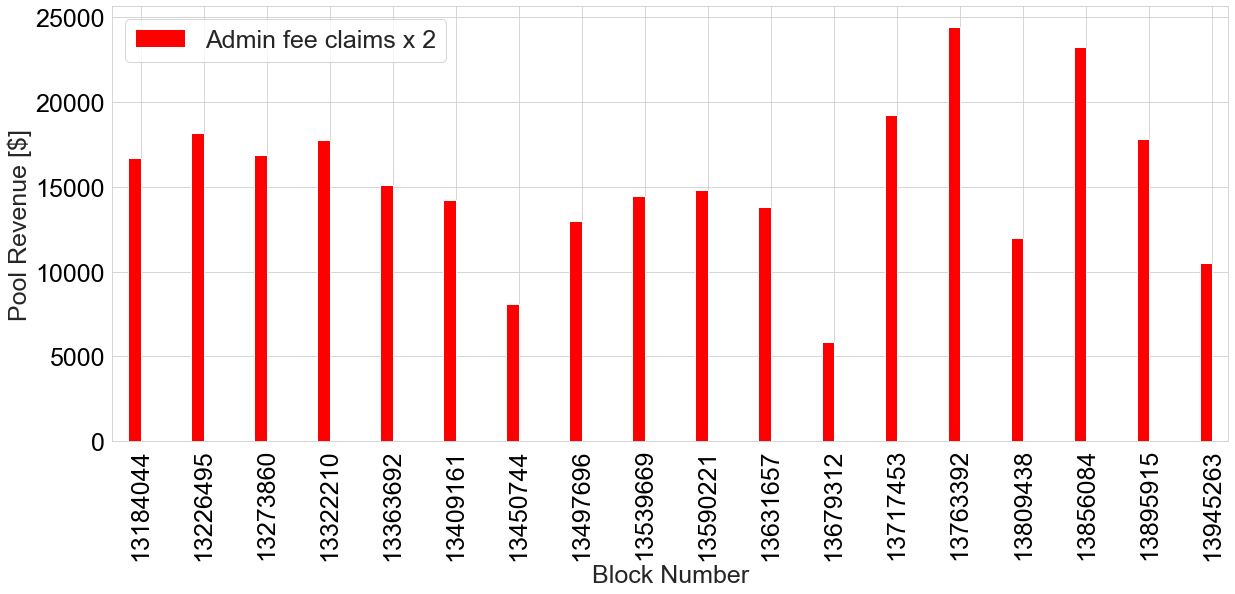

In [28]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_fees']*2).plot(
    ax=ax,
    color='red',
    kind='bar',
    label='Admin fee claims x 2',
    width=0.2,
    position=1,
)

ax.set_ylabel("Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

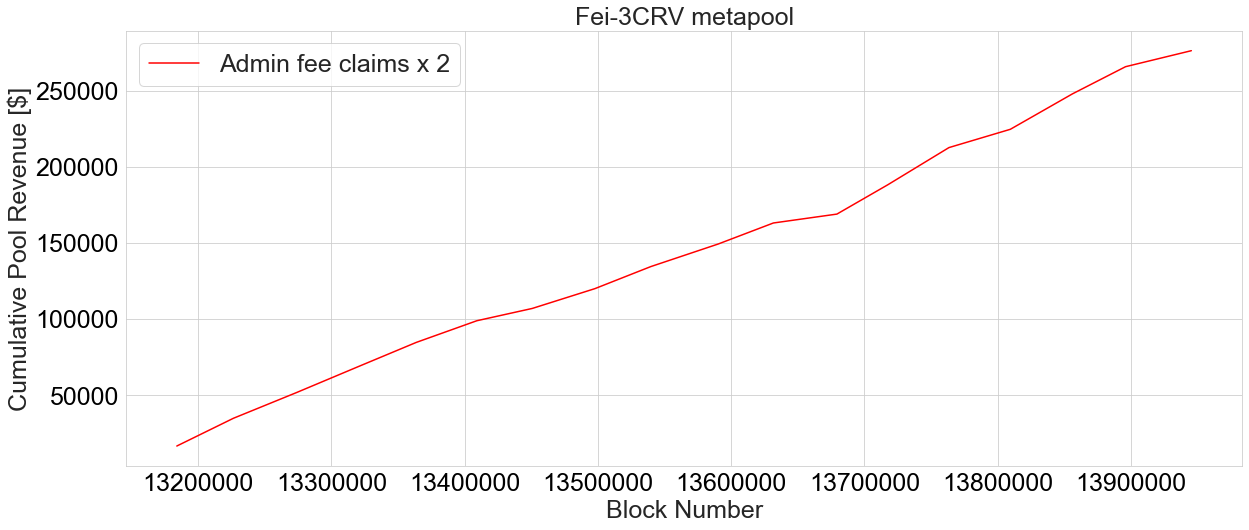

In [33]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_fees['total_fees']*2).cumsum().plot(
    ax=ax,
    color='red',
    label='Admin fee claims x 2',
)

ax.set_ylabel("Cumulative Pool Revenue [$]", fontsize=25)
ax.set_xlabel("Block Number", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_title("Fei-3CRV metapool", fontsize=25)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);